PART ONE:EXTRACT NEWS DATA FROM THE DATASET


    Objective:The goal of this milestone is to extract the news data from the dataset, apply standard text cleaning process and separate out training and target variables.

WORKFLOW:

Step One

    Import necessary modules

In [1]:
from __future__ import unicode_literals, print_function, division

import glob
import json
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

Step Two

    Define some necessary constants

In [2]:
stop_words = stopwords.words('english')
contraction_map = {"ain't": "is not", "aren't": "are not", "can't": "cannot", "'cause": "because",
                   "could've": "could have", "couldn't": "could not",

                   "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
                   "hasn't": "has not", "haven't": "have not",

                   "he'd": "he would", "he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you",
                   "how'll": "how will", "how's": "how is",

                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
                   "I'm": "I am", "I've": "I have", "i'd": "i would",

                   "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have", "i'm": "i am",
                   "i've": "i have", "isn't": "is not", "it'd": "it would",

                   "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is",
                   "let's": "let us", "ma'am": "madam",

                   "mayn't": "may not", "might've": "might have", "mightn't": "might not",
                   "mightn't've": "might not have", "must've": "must have",

                   "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not",
                   "needn't've": "need not have", "o'clock": "of the clock",

                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have",

                   "she'd": "she would", "she'd've": "she would have", "she'll": "she will",
                   "she'll've": "she will have", "she's": "she is",

                   "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
                   "so've": "so have", "so's": "so as",

                   "this's": "this is", "that'd": "that would", "that'd've": "that would have", "that's": "that is",
                   "there'd": "there would",

                   "there'd've": "there would have", "there's": "there is", "here's": "here is", "they'd": "they would",
                   "they'd've": "they would have",

                   "they'll": "they will", "they'll've": "they will have", "they're": "they are",
                   "they've": "they have", "to've": "to have",

                   "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
                   "we'll've": "we will have", "we're": "we are",

                   "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have",
                   "what're": "what are",

                   "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
                   "where'd": "where did", "where's": "where is",

                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is",
                   "who've": "who have",

                   "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not",
                   "won't've": "will not have",

                   "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
                   "y'all": "you all",

                   "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are",
                   "y'all've": "you all have",

                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will",
                   "you'll've": "you will have",

                   "you're": "you are", "you've": "you have"}
SOS_token = 0
EOS_token = 1

Step Three

    Define a function preprocess(text) that cleans the input string. Specifically, it does the following things:
    1.Convert text to lowercase
    2.Split the text using Python split() function
    3.Apply the contraction hashmap on all the words of the text
    4.Remove the stopwords that are in English
    5.Remove 's. 
    6.Use regular expression to remove parentheses outside a word. 
    7.Use regular expression to remove punctuations
    8.Use regular expression to add a space character before and after the full stop.
    Call the preprocess(text) function for all the items of dataset and target. Store the results in X and Y respectively.At this point, the length of X and Y should both be 94403.

In [3]:
def preprocess(text):
    text = text.lower()
    text = text.split()
    for i in range(len(text)):
        word = text[i]
        if word in contraction_map:
            text[i] = contraction_map[word]
    text = " ".join(text)
    text = text.split()
    new_text = [useful for useful in text if useful not in stop_words]
    text = " ".join(new_text)
    text = text.replace("'s", '').replace("’s", '')  # convert your's -> your
    text = re.sub(r'\(|\)', '', text)  # remove (words)
    text = re.sub(r'[^a-zA-Z0-9. ]', '', text)  # remove punctuations
    text = re.sub(r'\.', ' . ', text)
    return text

Step Four
    
    define a class Lang which inclues some functions as below:
    1.Create a hashmap word2index that keeps track of when each word first appeared in the text. This is for both the X and Y.
    2.Create a hashmap index2word to keep track of which index is which word.
    3.Create a separate hashmap word2count to count the number of occurrences of each word. We will need this later to replace rare words.
    4.Mark the start of the sentence and end of the sentence for all of the sentences in the target list. Define SOS_token = 0 and EOS_token = 1

In [4]:
class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split():
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

Step Five

    In this function, we define two variables -- max_len_text = 600 and max_len_target = 30 and disregard any input beyond this length.

In [5]:
# disregard any input beyond the length
def select_short(dataset, target, max_len_text=600, max_len_target=30):
    short_text = []
    short_summary = []
    for i in range(len(dataset)):
        if (len(target[i].split()) <= max_len_target and len(dataset[i].split()) <= max_len_text):
            short_text.append(dataset[i])
            short_summary.append(target[i])
    return pd.DataFrame({'text': short_text, 'summary': short_summary})

Step Six

    Define a function readData(text, summary) that takes text and summary as input. Here text and summary are two lists of strings. When we call this readData function, we will call it with our cleaned data X and Y respectively. This function does the following operations:
    1.Creates a list from text and summary as in pairs = [[text[i],summary[i]] for i in range(len(text))]
    2.Creates input and output object by passing text and summary to the Lang class Note that we are only creating objects here. Not executing any other functions from the Lang class.
    3.Return input, output, pairs

In [6]:
def readData(text, summary):
    print("Reading lines...")
    # Split every line into pairs and normalize
    pairs = [[text[i], summary[i]] for i in range(len(text))]
    input_lang = Lang(text)
    output_lang = Lang(summary)
    return input_lang, output_lang, pairs

Step Seven

    Now we define a function prepareData that takes list(df['text']) and list(df['summary']) as input. This prepareData function calls readData(X,Y) and gets back input, output, and pairs.

In [7]:
def prepareData(lang1, lang2):
    input_lang, output_lang, pairs = readData(lang1, lang2)
    print("Read %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    return input_lang, output_lang, pairs

Step Eight

    Finally we come to the main function.

len(dataset)=94403, len(target)=94403
len(X)=94403, len(Y)=94403
Max number of words of string in X: 11721
Ratio of string in Y with words no more than 600: 0.8595171763609207


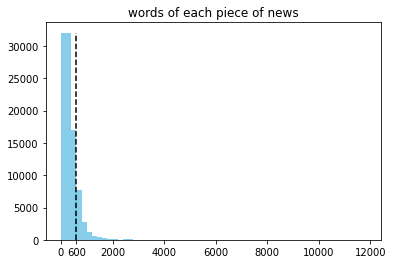

Max number of words of string in Y: 228
Ratio of string in Y with words no more than 30: 0.9998305138607884


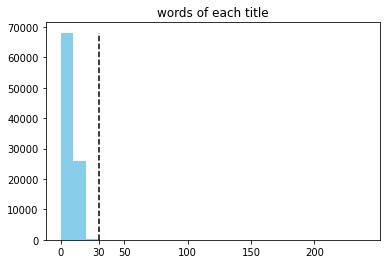

Ratio of X, Y pairs with X words no more than 600 and Y words no more than 30: 0.8593582831054097
temp_df.head()=                                                text  \
0  fda launches app health care professionals rep...   
1  regina yan  many traits open mind might one va...   
2  cure id app allows clinicians share discuss ex...   
3  dsb composed representatives two fda centers e...   
4  centre health protection chp department health...   

                                             summary  
0  fda launches app health care professionals rep...  
1                           csuite awards regina yan  
2  fda launches infectious disease crowdsourcing ...  
3                        drug safety oversight board  
4                       suspected mers case reported  
Reading lines...
Read 78519 sentence pairs
Counting words...
78519


In [8]:
def main():
    # Read reference files, extract the value of the text key and title key from those objects.
    # Put those values in a list called dataset and target respectively. The length of the list and will be 94403.
    dataset, target, json_content = [], [], []
    for file_name in glob.glob('*.json', recursive=True):
        with open(file_name, encoding="utf-8") as f:
            json_content.extend(list(map(json.loads, f.readlines())))
    for item in json_content:
        dataset.append(item["text"])
        target.append(item["title"])
    print(f"{len(dataset)=}, {len(target)=}")
    X = list(map(preprocess, dataset))
    Y = list(map(preprocess, target))
    print(f"{len(X)=}, {len(Y)=}")

    # The following code calculate and plot the distribution of lengths in dataset and target.
    # The result shows that 85.95% of texts is no longer than 600 and 99.98% of titles is no longer than 30.
    # The items that satisfy both conditions above count up to 85.94%
    X_n_word = np.array([len(i.split()) for i in X])
    print(f"Max number of words of string in X: {np.max(X_n_word)}\n"
          f"Ratio of string in Y with words no more than 600: {X_n_word[X_n_word <= 600].shape[0] / X_n_word.shape[0]}")
    val_bin, _, _ = plt.hist(X_n_word, bins=list(range(0, 12000, 200)), color="skyblue")
    plt.xticks([600] + list(range(0, 14000, 2000)))
    plt.plot([600] * 2, [0, max(val_bin)], "k--")
    plt.title("words of each piece of news")
    plt.savefig("X.png", dpi=800)
    plt.show()
    Y_n_word = np.array([len(i.split()) for i in Y])
    print(f"Max number of words of string in Y: {np.max(Y_n_word)}\n"
          f"Ratio of string in Y with words no more than 30: {Y_n_word[Y_n_word <= 30].shape[0] / Y_n_word.shape[0]}")
    val_bin, _, _ = plt.hist(Y_n_word, bins=list(range(0, 250, 10)), color="skyblue")
    plt.xticks([30] + list(range(0, 250, 50)))
    plt.plot([30] * 2, [0, max(val_bin)], "k--")
    plt.title("words of each title")
    plt.savefig("Y.png", dpi=800)
    plt.show()
    print(f"Ratio of X, Y pairs with X words no more than 600 and Y words no more than 30: "
          f"{Y_n_word[(Y_n_word <= 30) & (X_n_word <= 600)].shape[0] / Y_n_word.shape[0]}")

    temp_df = select_short(X, Y)
    print(f"{temp_df.head()=}")
    # We need to remove those empty strings both from summary and the text column.
    new_df = temp_df[temp_df['summary'].str.strip().astype(bool)]
    df = new_df[new_df['text'].str.strip().astype(bool)]
    df.to_csv("skimmed_news.csv", index=False, encoding="utf-8")

    # df = pd.read_csv("skimmed_news.csv", encoding="utf-8")
    input_lang, output_lang, pairs = prepareData(list(df['text']), list(df['summary']))
    print(len(pairs))


if __name__ == "__main__":
    main()